<a href="https://colab.research.google.com/github/nakisa84/Springboard/blob/main/capston%202%20project/notebooks/generate_synthetic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### In this notebook, data has been upsampled using SMOTE technique:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import math
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [2]:
# from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load the clean data 
fpath = '/content/drive/My Drive/Springboard/capston 2 project/data/bc_data_cleaned_labeled.csv'
df = pd.read_csv(fpath)

# df = pd.read_csv('../data/bc_data_cleaned_labeled.csv')
df.head()

,Tumor Size,Regional Node Examined,Reginol Node Positive,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed,T Stage_T2,T Stage_T3,T Stage_T4,N Stage_N2,N Stage_N3,6th Stage_IIB,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC,Grade_Grade II,Grade_Grade III,Grade_anaplastic,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive,Status
0,40,19,11,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,1,0
1,45,25,9,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,1,0
2,25,4,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1
3,19,26,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1
4,35,21,5,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,1,1


In [4]:
#devide the dataset to features and target
X = df.drop('Status',axis = 1)
y = df[['Status']]


In [5]:
#devide the data to test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

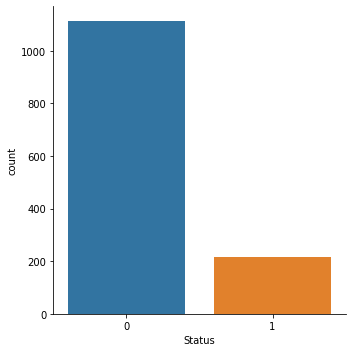

In [6]:
 sns.catplot(x='Status',data=y_test,kind="count");

In [26]:
#run random forest classification on the data 
from sklearn.metrics import f1_score
clf = RandomForestClassifier(n_estimators=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.29461756373937675

In [13]:
confusion_matrix(y_test, y_pred)

array([[1035,   78],
       [ 168,   47]])

In [14]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

0.18735919461894

As seen the number of false negative is high in above dataset, its around 77% wrong prediction for dead prediction. T
Therefore we will use SMOTE model to genrate and upsample the minor class in out target dataset. 

In [15]:
# transform the dataset
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)

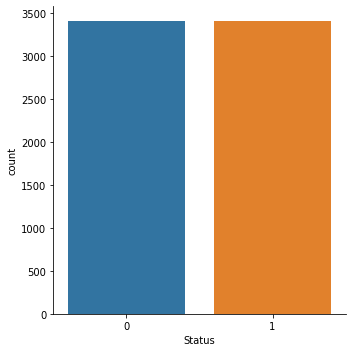

In [16]:
 sns.catplot(x='Status',data=y_smote,kind="count");

As seen in above histogram the taget has balanced distribuation.

In [17]:
#devide the new upsampled data to train and test
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote,y_smote, test_size=0.33, random_state=41)

In [27]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train_smote, y_train_smote)
y_pred_smote = clf.predict(X_test_smote)
f1_score(y_test_smote, y_pred_smote)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8347746927628585

We got a better score comparing to out dataset without any synthetic data.

In [28]:
confusion_matrix(y_test_smote, y_pred_smote)

array([[970, 166],
       [197, 917]])

In [29]:
matthews_corrcoef(y_test_smote, y_pred_smote)

0.6774729473660086

As seen in the confusion matrix the number of false negative decreased and not, the wrong prediction is around 15%.

In [31]:
synthetic_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)],axis = 1)

In [32]:
synthetic_data.tail()

,Tumor Size,Regional Node Examined,Reginol Node Positive,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed,T Stage_T2,T Stage_T3,T Stage_T4,N Stage_N2,N Stage_N3,6th Stage_IIB,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC,Grade_Grade II,Grade_Grade III,Grade_anaplastic,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive,Status
6811,30,2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1
6812,23,22,2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,1,1
6813,40,18,7,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,1,1
6814,21,38,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
6815,46,25,22,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1


In [ ]:
# fpath = '/content/drive/My Drive/Springbaord/capston 2 project/data/bc_data_synthetic.csv'
fpath = '../data/bc_data_synthetic.csv'
synthetic_data.to_csv(fpath, index=False)